In [9]:
%matplotlib inline

In [10]:
import os
import numpy as np
import pandas as pd
from IPython.display import display

In [11]:
from importlib import reload
import rsenv
RSENV_DIR = os.path.dirname(rsenv.__file__)
EXAMPLE_DATA_DIR = os.path.join(os.path.dirname(RSENV_DIR), 'examples', 'example_data')
from rsenv.data_analysis.nanodrop import denovix

In [12]:
reload(denovix)

print(rsenv.__file__)
print(RSENV_DIR)
print(EXAMPLE_DATA_DIR)

fn = os.path.join(EXAMPLE_DATA_DIR, 'denovix', 'report_53.538.csv')

df, metadata = denovix.csv_to_dataframe(fn)


c:\users\rasse\dev\rsenv\rsenv\__init__.py
c:\users\rasse\dev\rsenv\rsenv
c:\users\rasse\dev\rsenv\examples\example_data
len(y_vals): 10
len(metadata): 10
len(columns): 10
len(x_vals): 651
y_vals.shape (10, 651)


In [13]:
# rows of columns
# columns do not have to be unique.
# index, in general, does not have to be unique.
testdf = pd.DataFrame(data=[np.arange(10), np.arange(10, 20)], columns=list('aabbcdefghijklmn'[:10]), index=[1, 1])
# selecting non-unique locations will select all matching columns/rows.
testdf['a']  # [col]
testdf.loc[1, 'a']  # [rows, cols]


,a,a
1,0,1
1,10,11


In [14]:
# pd.DataFrame(data=[np.arange(10), np.arange(10, 20)], columns=list('abcdefghijklmn'[:2]), index=np.arange(2, 12))

# With Pandas, you first select the data, then plot:
# df.plot(y=['RS501b A8-3', 'RS501b B4-4'])  # no.

df[['RS501b A8-3', 'RS501b B4-4']]  # default is to get column by name;
# To get a selection of rows: df.loc[rows, cols]
display(df.loc[250:300:5, ['RS501b A8-3', 'RS501b B4-4']])
# Use df.iloc to by-pass the axis index (rows, cols) and use numeric, zero-based index:
display(df.iloc[20:30, [1, 2]])



,RS501b A8-3,RS501b B4-4
250,2.513,0.471
255,3.189,0.382
260,3.845,0.299
265,4.155,0.264
270,4.261,0.275
275,4.023,0.296
280,3.392,0.326
285,2.658,0.348
290,1.884,0.356
295,1.185,0.349


,RS501b B4-4,RS501b C10-5
210,0.0,0.0
211,0.0,0.0
212,0.0,0.0
213,0.0,0.0
214,0.0,0.0
215,0.0,0.0
216,0.0,0.0
217,0.0,0.0
218,0.0,0.0
219,0.0,0.0


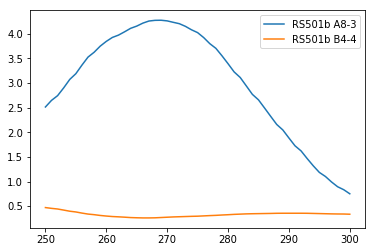

In [15]:
df.loc[250:300, ['RS501b A8-3', 'RS501b B4-4']].plot()


In [34]:
import shlex

names = df.columns
nidxs = list(range(len(names)))
print(df.columns)


requested = shlex.split('all -1 -"RS501b A8-3"')
print("\nrequested:", requested)
selected_idxs = translate_all_requests_to_idxs(requested, candidates=df.columns)
selected_cols = [df.columns[idx] for idx in selected_idxs]
print(selected_idxs)
print(", ".join(selected_cols))


requested = shlex.split('all -1 -"RS501b A8-3" -RS502c*')
print("\nrequested:", requested)
selected_idxs = translate_all_requests_to_idxs(requested, candidates=df.columns, match_method='glob')
selected_cols = [df.columns[idx] for idx in selected_idxs]
print(selected_idxs)
print(", ".join(selected_cols))



Index(['RS501b A8-3', 'RS501b B4-4', 'RS501b C10-5', 'RS501b D12-6',
       'RS501b D9-8', 'RS501c A7 df20-10', 'RS501c C9C10 df20-11',
       'RS501c C11 df20-12', 'RS501c C12D12 df20-13', 'RS501c D10D9 df20-14'],
      dtype='object')

requested: ['all', '-1', '-RS501b A8-3']
 + all            = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9] --> [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
 + -1             = [1] --> [0, 2, 3, 4, 5, 6, 7, 8, 9]
 + -RS501b A8-3   = [0] --> [2, 3, 4, 5, 6, 7, 8, 9]
[2, 3, 4, 5, 6, 7, 8, 9]
RS501b C10-5, RS501b D12-6, RS501b D9-8, RS501c A7 df20-10, RS501c C9C10 df20-11, RS501c C11 df20-12, RS501c C12D12 df20-13, RS501c D10D9 df20-14

requested: ['all', '-1', '-RS501b A8-3', '-RS502c*']
 + all            = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9] --> [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
 + -1             = [1] --> [0, 2, 3, 4, 5, 6, 7, 8, 9]
regex: (?s:RS501b\ A8\-3)\Z
 + -RS501b A8-3   = [0] --> [2, 3, 4, 5, 6, 7, 8, 9]
regex: (?s:RS502c.*)\Z
 + -RS502c*       = [] --> [2, 3, 4, 5, 6, 7, 8, 9]
[2,

In [37]:
eval("[1:2]")

SyntaxError: invalid syntax (<string>, line 1)

In [3]:
from glob import glob
from fnmatch import filter as fnfilter
from fnmatch import fnmatch, fnmatchcase


In [4]:
fnfilter?

In [43]:
import winreg
reg = winreg.ConnectRegistry(None, winreg.HKEY_CURRENT_USER)
key = winreg.OpenKey(
    reg,
    r"SOFTWARE\\Microsoft\\Windows\\CurrentVersion\\Lock Screen\\Creative")
print(key)
url = winreg.QueryValueEx(key, 'LandscapeAssetPath')[0]
print(url)


<PyHKEY:0x0000000000000410>
C:\Users\rasse\AppData\Local\Packages\Microsoft.Windows.ContentDeliveryManager_cw5n1h2txyewy\LocalState\Assets\a95e38c4d5d44cb9a8e619a79da132351cf78ee4e9d261582b13c2f13c227143
